## Importing the necessary modules

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

## Loading the data

In [99]:
match=pd.read_csv("data/Matches.csv")

ballbyball=pd.read_csv("data/ballbyball.csv")

## Exploring the data

In [100]:
ballbyball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [101]:
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [102]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [103]:
print(ballbyball.head())
ballbyball["batting_team"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)
ballbyball["bowling_team"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)
ballbyball["batting_team"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)
ballbyball["bowling_team"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)

       id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type           batting_team  \
0            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
1         

Converting the date column in the match data file to a datetime object for easier analysis

In [104]:
match['date']= pd.to_datetime(match['date'])

## Looking into the missing values

In [105]:
ballbyball.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [106]:
match.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

There are 4 rows were the match winner column have a null value.
I explored what the 4 rows were,


In [107]:
match[match['result'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


If no result was announced for matches it means that the matches were interrupted and no results were announced and no winner was declared so I'm filling those rows with the values "no result"

Reference:
https://www.iplt20.com/about/match-playing-conditions/law-16-start-of-play-cessation-of-play

In [108]:
match['winner'] = match['winner'].fillna("No winner")
match["result"] = match["result"].fillna("No result")

In [109]:
match['winner'] = match['winner'].fillna("No result")

In [110]:
##check
ballbyball.groupby(['id', 'inning']).sum()

over  ball  batsman_runs  extra_runs  total_runs  \
id      inning                                                     
335982  1       1169   448           205          17         222   
        2        725   383            63          19          82   
335983  1       1167   449           234           6         240   
        2       1171   449           196          11         207   
335984  1       1152   434           122           7         129   
...              ...   ...           ...         ...         ...   
1237178 2       1120   445           122          10         132   
1237180 1       1193   455           181           8         189   
        2       1172   456           166           6         172   
1237181 1       1178   441           152           4         156   
        2        990   388           153           4         157   

                non_boundary  is_wicket  
id      inning                           
335982  1                  0          3  
        2                  0         10  
335983  1                  0          5  
        2                  0          4  
335984  1                  0          8  
...                      ...        ...  
1237178 2                  0          4  
1237180 1                  1          3  
        2                  0          8  
1237181 1                  0          7  
        2                  0          5  

[1630 rows x 7 columns]

Finding the names of the venues

In [111]:
match.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

From the output we see that some of the names are repeated with different formatting so I'm changing the names.

In [112]:
match["venue"].replace({"M.Chinnaswamy Stadium": "M Chinnaswamy Stadium"}, inplace=True)
match["venue"].replace({"Punjab Cricket Association IS Bindra Stadium, Mohali":'Punjab Cricket Association Stadium, Mohali'},inplace=True)

In [113]:
match.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

We can see that the names of few teams Rising Pune Supergiants are being repeated with a few minor changes so changing that into a single name.

The Delhi Daredevils team was renamed into delhi capitals after the year 2018 so for easy analysis purposes I'm changing the name to delhi capitals for all the years.

In [114]:
match["winner"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)
match["team1"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)
match["team2"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)
match["toss_winner"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)

match["winner"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)
match["team1"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)
match["team2"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)
match["toss_winner"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)

# Analysis 1

## Analysis of the influence of the location on the outcome of the game.
I intend to analyze whether playing in the home location gives the team a better probability of winning?


- Finding all the unique locations where the game was played

In [115]:
match.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St


- Creating a new column called the hometeam column for all the matches played depending on the stadium in which the match was played.
- Code(function) written based on the data from: https://en.wikipedia.org/wiki/List_of_Indian_Premier_League_venues

In [116]:
# def label_hometeam (row):
#     if (row["city"]=='Bangalore') | (row["city"]=='Bengaluru'):
#         return "Royal Challengers Bangalore"
#     if row["city"]=='Chandigarh':
#         return "Kings XI Punjab"
#     if row["city"]=='Delhi' or row["city"]=='Raipur':
#         return "Delhi Capitals"
#     if row["city"]=='Kolkata':
#         return 'Kolkata Knight Riders'
#     if row["city"]=='Mumbai':
#         return "Mumbai Indians"
#     if row["city"]=='Jaipur':
#         return "Rajasthan Royals"
#     if row["city"]=='Hyderabad' or row["city"]=="Visakhapatnam":
#         if row['date'].year<=2012:
#             return "Deccan Chargers"
#     if (((row["city"]=='Hyderabad') | (row["city"]=="Visakhapatnam"))):
#         if (row['date'].year>2012):
#             return "Sunrisers Hyderabad"
#     if row["city"]=="Chennai":
#         return "Chennai Super Kings"
    
#     if row["city"]=='Mumbai':
#         return "Mumbai Indians"
    
    
#     if row["city"]=='Delhi' or row["city"]=='Raipur':
#         return "Delhi Capitals"
#     if ((row["city"]=='Rajkot') or (row["city"]=='Kanpur')) and ((row['date'].year==2016) or (row['date'].year==2017)):
#         return "Gujarat Lions"
    
#     if row["city"]=='Kochi':
#         if row['date'].year==2011:
#             return 'Kochi Tuskers Kerala'
    
#     if row["city"]=='Pune' and row['date'].year<=2013:
#         return 'Pune Warriors'
#     if row["city"]=='Pune' and ((row['date'].year==2016) or (row['date'].year==2016)):
#         return 'Rising Pune Supergiants'
    
#     else:
#         return "neutral"
# match["hometeam"]=match.apply(lambda row:label_hometeam(row),axis=1)

In [117]:
def label_hometeam (row):
    if (row["venue"]=='M Chinnaswamy Stadium'):
        return "Royal Challengers Bangalore"
    if row["venue"]=='Punjab Cricket Association Stadium, Mohali':
        return "Kings XI Punjab"
    if row["venue"]=='Feroz Shah Kotla':
        return "Delhi Capitals"
    if row["venue"]=='Eden Gardens':
        return 'Kolkata Knight Riders'
    if row["venue"]=='Wankhede Stadium':
        return "Mumbai Indians"
    if row["venue"]=='Sawai Mansingh Stadium':
        return "Rajasthan Royals"
    if row["venue"]=='Rajiv Gandhi International Stadium, Uppal':
        if row['date'].year<=2012:
            return "Deccan Chargers"
    if row["venue"]=='Rajiv Gandhi International Stadium, Uppal':
        if (row['date'].year>2012):
            return "Sunrisers Hyderabad"
    if row["venue"]=='MA Chidambaram Stadium, Chepauk':
        return "Chennai Super Kings"
    if row["venue"]=='Dr DY Patil Sports Academy':
        if row['date'].year==2008:
            return 'Mumbai Indians'
        if row['date'].year==2010:
            return 'Deccan Chargers'
        if row['date'].year==2011:
            return 'Pune Warriors'
    if row["venue"]=='Brabourne Stadium':
        if row['date'].year==2010:
            return "Mumbai Indians"
        if row['date'].year==2015:
            return "Rajasthan Royals"
    if row["venue"]=='Barabati Stadium':
        if row['date'].year>=2010 and row['date'].year<=2012:
            return 'Deccan Chargers'
        if row['date'].year==2014:
            return "Kings XI Punjab"
    if row["venue"]=='Sardar Patel Stadium, Motera':
        if row['date'].year>=2010 and row['date'].year<=2015:
            return "Rajasthan Royals"
    if row["venue"]=='Vidarbha Cricket Association Stadium, Jamtha':
        if row['date'].year==2010:
            return 'Deccan Chargers'
    if row["venue"]=='Himachal Pradesh Cricket Association Stadium':
        if row['date'].year>=2010 and row['date'].year<=2013:
            return "Kings XI Punjab"
    if row["venue"]=='Nehru Stadium':
        if row['date'].year==2011:
            return 'Kochi Tuskers Kerala'
    if row["venue"]=='Holkar Cricket Stadium':
        if row['date'].year==2011:
            return 'Kochi Tuskers Kerala'
        if row['date'].year==2017 or row['date'].year==2018:
            return "Kings XI Punjab"
    if row["venue"]=='Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':
        if row['date'].year==2015:
            return "Sunrisers Hyderabad"
        if row['date'].year==2012:
            return 'Deccan Chargers'
    if row["venue"]=='Maharashtra Cricket Association Stadium':
        if row['date'].year==2012 or row['date'].year==2013:
            return 'Pune Warriors'
        if row['date'].year==2015:
            return "Kings XI Punjab"
        if row['date'].year==2016 or row['date'].year==2017:
            return 'Rising Pune Supergiants'
        if row['date'].year==2018:
            return "Chennai Super Kings"
    if row["venue"]=='Shaheed Veer Narayan Singh International Stadium':
        if row['date'].year>=2013 or row['date'].year<=2016:
            return "Delhi Capitals"
    if row["venue"]=='JSCA International Stadium Complex':
        if row['date'].year==2013:
            return 'Kolkata Knight Riders'
        if row['date'].year==2014:
            return "Chennai Super Kings"
    if row["venue"]=='Saurashtra Cricket Association Stadium' or row["venue"]=='Green Park':
        if row['date'].year==2016 or row['date'].year==2017:
            return "Gujarat Lions"    
    else:
        return "neutral"
match["hometeam"]=match.apply(lambda row:label_hometeam(row),axis=1)

In [118]:
def label_homegame(row):
    if row["team1"]==row["hometeam"]:
        return row["team1"]
    elif row["team2"]==row["hometeam"]:
        return row["team2"]
    else:
        return "awaygame"
match["homegamefor"]=match.apply(lambda row:label_homegame(row),axis=1)

In [119]:
match

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,hometeam,homegamefor
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,Royal Challengers Bangalore,Royal Challengers Bangalore
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,Kings XI Punjab,Kings XI Punjab
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,Delhi Capitals,Delhi Capitals
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,Mumbai Indians,Mumbai Indians
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,Kolkata Knight Riders,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,neutral,awaygame
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,neutral,awaygame
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,neutral,awaygame
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,neutral,awaygame


From the newly extracted data,For every team I have calculated 
- the number of home games
> The number of matches in which the team is either team1 or team2 and played in the team's homeground
- the number of away games
> The number of matches in which the team is either team1 or team2 and is not played in the team's homeground
- the number of wins in home games
> The number of matches in which the team is either team1 or team2 and played in the team's homeground and the team is the winner
- the number of wins in away games 
> The number of matches in which the team is either team1 or team2 and is not played in the team's homeground and the team is the winner
- the total number of wins
> The number of matches in which the team is either team1 or team2 and the team has won
- the total number of losses
> The number of matches in which the team is either team1 or team2 and the team has lost



In [120]:
data=[]
for i in match.team1.unique():
    homematches=len(match[((match["team1"]==i) | (match["team2"]==i)) & (match["homegamefor"]==i)])
    homematchwins=len(match[((match["team1"]==i) | (match["team2"]==i)) & (match["homegamefor"]==i) &(match["winner"]==i)])
    awaymatches=len(match[((match["team1"]==i) | (match["team2"]==i)) & (match["homegamefor"]!=i)])
    awaymatchwins=len(match[((match["team1"]==i) | (match["team2"]==i)) & (match["homegamefor"]!=i) & (match["winner"]==i)])
    wins=len(match[((match["team1"]==i) | (match["team2"]==i)) &(match["winner"]==i)])
    losses=len(match[((match["team1"]==i) | (match["team2"]==i)) &(match["winner"]!=i)])
    data.append([i,homematches,awaymatches,homematchwins,awaymatchwins,wins,losses])
#     row={"team_name":i,"home matches":homematches,"away matches":awaymatches,"home match wins":homematchwins,"away match wins":awaymatchwins
per_team_stats=pd.DataFrame(data,columns=["team_name","home matches","away matches","home match wins","away match wins","wins","losses"])

In [121]:
per_team_stats

,team_name,home matches,away matches,home match wins,away match wins,wins,losses
0,Royal Challengers Bangalore,76,119,37,54,91,104
1,Kings XI Punjab,77,113,39,49,88,102
2,Delhi Capitals,76,118,35,51,86,108
3,Mumbai Indians,77,126,50,70,120,83
4,Kolkata Knight Riders,76,116,46,53,99,93
5,Rajasthan Royals,62,99,41,40,81,80
6,Deccan Chargers,31,44,8,21,29,46
7,Chennai Super Kings,66,112,47,59,106,72
8,Kochi Tuskers Kerala,7,7,3,3,6,8
9,Pune Warriors,7,39,2,10,12,34


In [122]:
per_team_stats["home_loss"]=(per_team_stats["home matches"]-per_team_stats["home match wins"])
per_team_stats["away_loss"]=(per_team_stats["away matches"]-per_team_stats["away match wins"])
per_team_stats["away_loss"]=(per_team_stats["home match wins"]/per_team_stats["home matches"])*100
per_team_stats["home_win%"]=(per_team_stats["home match wins"]/per_team_stats["home matches"])*100
per_team_stats["away_win%"]=(per_team_stats["away match wins"]/per_team_stats["away matches"])*100
per_team_stats["home_loss%"]=((per_team_stats["home matches"]-per_team_stats["home match wins"])/per_team_stats["home matches"])*100
per_team_stats["away_loss%"]=((per_team_stats["away matches"]-per_team_stats["away match wins"])/per_team_stats["away matches"])*100

In [123]:
per_team_stats.head()

,team_name,home matches,away matches,home match wins,away match wins,wins,losses,home_loss,away_loss,home_win%,away_win%,home_loss%,away_loss%
0,Royal Challengers Bangalore,76,119,37,54,91,104,39,48.684211,48.684211,45.378151,51.315789,54.621849
1,Kings XI Punjab,77,113,39,49,88,102,38,50.649351,50.649351,43.362832,49.350649,56.637168
2,Delhi Capitals,76,118,35,51,86,108,41,46.052632,46.052632,43.220339,53.947368,56.779661
3,Mumbai Indians,77,126,50,70,120,83,27,64.935065,64.935065,55.555556,35.064935,44.444444
4,Kolkata Knight Riders,76,116,46,53,99,93,30,60.526316,60.526316,45.689655,39.473684,54.310345


- I converted the columns that had data about the wins to rows using melt()

In [124]:
winstats=per_team_stats[["team_name","home match wins","away match wins"]].melt(id_vars=["team_name"], var_name="variable", value_name="value")
winstats

,team_name,variable,value
0,Royal Challengers Bangalore,home match wins,37
1,Kings XI Punjab,home match wins,39
2,Delhi Capitals,home match wins,35
3,Mumbai Indians,home match wins,50
4,Kolkata Knight Riders,home match wins,46
5,Rajasthan Royals,home match wins,41
6,Deccan Chargers,home match wins,8
7,Chennai Super Kings,home match wins,47
8,Kochi Tuskers Kerala,home match wins,3
9,Pune Warriors,home match wins,2



- I converted the columns that had data about the home matches and away matches to rows using melt()

In [125]:
homematchstats=per_team_stats[["team_name","home match wins","home_loss"]].melt(id_vars=["team_name"], var_name="variable", value_name="value").sort_values(by="team_name")
awaymatchstats=per_team_stats[["team_name","away match wins","away_loss"]].melt(id_vars=["team_name"], var_name="variable", value_name="value").sort_values(by="team_name")

## Plotting the summary of wins for all teams

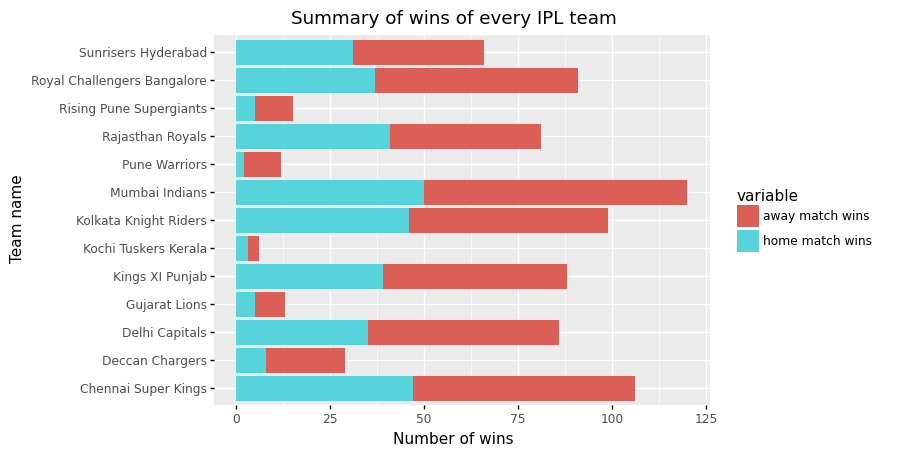

<ggplot: (8766281093795)>

In [126]:
from plotnine import *
plot=ggplot(winstats, aes('team_name', 'value', fill='variable'))
xlabel=ylab("Number of wins")
ylabel=xlab("Team name")
title=ggtitle("Summary of wins of every IPL team")
a=plot+ geom_bar(stat='identity', position='stack')+title+coord_flip()+xlabel+ylabel
a

## Plotting the breakdown of home matches for all teams

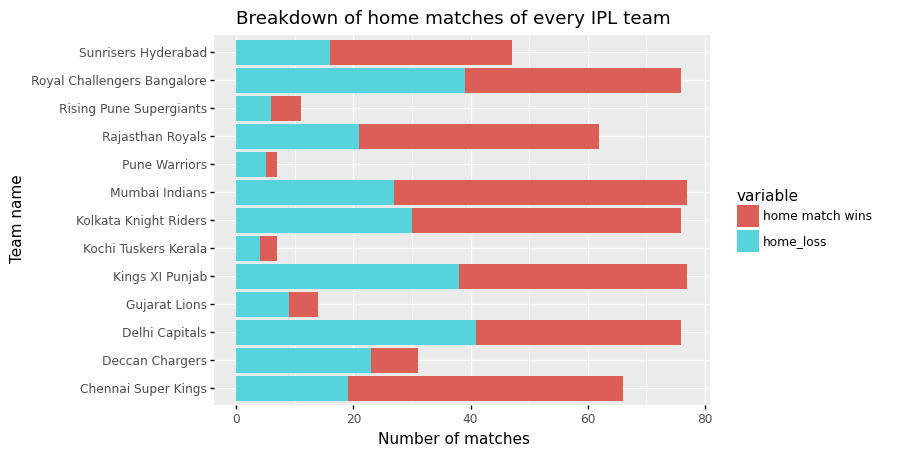

<ggplot: (8766212907015)>

In [127]:
plot=ggplot(homematchstats, aes('team_name', 'value', fill='variable'))
xlabel=ylab("Number of matches")
ylabel=xlab("Team name")
title=ggtitle("Breakdown of home matches of every IPL team")
a=plot+ geom_bar(stat='identity', position='stack')+title+coord_flip()+xlabel+ylabel
a

## Plotting the breakdown of away matches for all teams

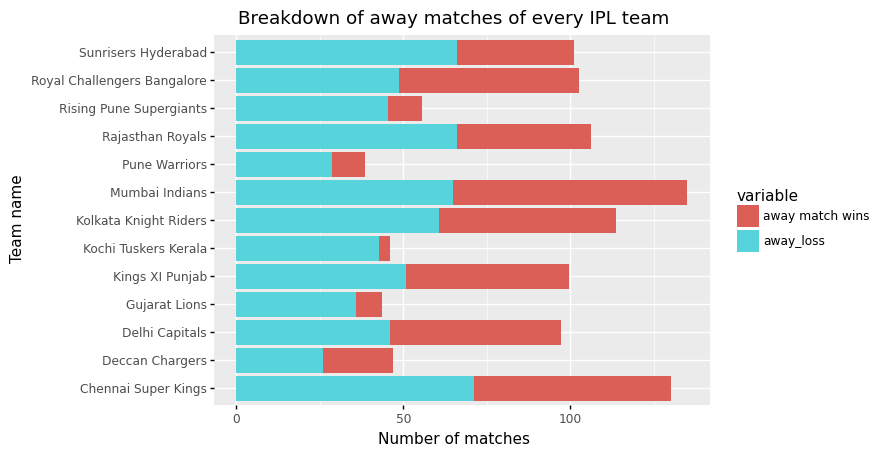

<ggplot: (8766230903661)>

In [128]:
plot=ggplot(awaymatchstats, aes('team_name', 'value', fill='variable'))
xlabel=ylab("Number of matches")
ylabel=xlab("Team name")
title=ggtitle("Breakdown of away matches of every IPL team")
a=plot+ geom_bar(stat='identity', position='stack')+title+coord_flip()+xlabel+ylabel
a

# Analysis 2:
## Does winning the toss have an impact on the result of the match?

### Cross tabulation to show the decisions that different teams took when they won the toss

In [129]:
teamtossstats=match[["toss_winner","toss_decision"]]
ct = pd.crosstab(teamtossstats.toss_winner,teamtossstats.toss_decision,margins=True,normalize='index')
ct

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,0.525773,0.474227
Deccan Chargers,0.558140,0.441860
Delhi Capitals,0.360000,0.640000
Gujarat Lions,0.066667,0.933333
Kings XI Punjab,0.317647,0.682353
Kochi Tuskers Kerala,0.375000,0.625000
Kolkata Knight Riders,0.346939,0.653061
Mumbai Indians,0.452830,0.547170
Pune Warriors,0.550000,0.450000


#### Observation:
From the crosstabulation it is evident that most times the winner of the toss decided to field first.

#### Function that marks the matches in which the toss winner also wins the match

In [130]:
def labeldualwins(row):
    if row["toss_winner"]==row["winner"]:
        return "Won"
    else:
        return "Lost"
match["tossandgamewins"] = match.apply (lambda row: labeldualwins(row), axis=1)

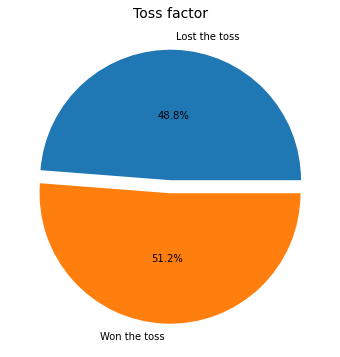

In [131]:
import matplotlib.pyplot as plt
data = match.groupby("tossandgamewins")["winner"].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=["Lost the toss","Won the toss"], pctdistance=0.5)
plt.title("Toss factor", fontsize=14);

#### OBSERVATION:
If a team is winning the toss then the chance of winning is 51.2% and losing is 48.8%.

From the newly extracted data,For every team I have calculated 
- the number of matches in which teams have won the toss and the match
- the  number of matches in which teams have won the toss but not the match
- the  number of matches in which teams have lost the toss but not the match
- the  number of matches in which teams have lost the toss and the match


In [132]:
data=[]
for i in match.team1.unique():
    won_toss_and_match=len(match[(match["winner"]==i) & (match["toss_winner"]==i)])
    won_toss_but_not_match=len(match[(match["winner"]!=i) & (match["toss_winner"]==i)])
    lost_toss_but_not_match=len(match[(match["winner"]==i) & (match["toss_winner"]!=i)])
    lost_toss_and_match=len(match[(match["winner"]!=i) & (match["toss_winner"]!=i) & ((match["team1"]==i) | (match["team2"]==i))])
    data.append([i,won_toss_and_match,won_toss_but_not_match,lost_toss_but_not_match,lost_toss_and_match])
toss_stats=pd.DataFrame(data=data,columns=["Team","Won toss and match","Won toss not match","Lost toss not match","Lost toss and match"])
toss_stats

,Team,Won toss and match,Won toss not match,Lost toss not match,Lost toss and match
0,Royal Challengers Bangalore,43,44,48,60
1,Kings XI Punjab,36,49,52,53
2,Delhi Capitals,45,55,41,53
3,Mumbai Indians,61,45,59,38
4,Kolkata Knight Riders,55,43,44,50
5,Rajasthan Royals,44,43,37,37
6,Deccan Chargers,19,24,10,22
7,Chennai Super Kings,61,36,45,36
8,Kochi Tuskers Kerala,4,4,2,4
9,Pune Warriors,3,17,9,17


According to this webpage,https://en.wikipedia.org/wiki/Indian_Premier_League#Performance_in_the_IPL_by_title
The teams which have secured the most titles in order are,
- Mumbai Indians
- Chennai Super Kings
- Kolkata Knight Riders	

So I have plotted the toss statistics for the top three succesful teams.

In [133]:
toss_stats=toss_stats.T
toss_stats.columns=toss_stats.iloc[0]
toss_stats=toss_stats.iloc[1:,:]
toss_stats_successful=toss_stats[['Mumbai Indians','Chennai Super Kings','Kolkata Knight Riders']]

array([<AxesSubplot:ylabel='Mumbai Indians'>,
       <AxesSubplot:ylabel='Chennai Super Kings'>,
       <AxesSubplot:ylabel='Kolkata Knight Riders'>], dtype=object)

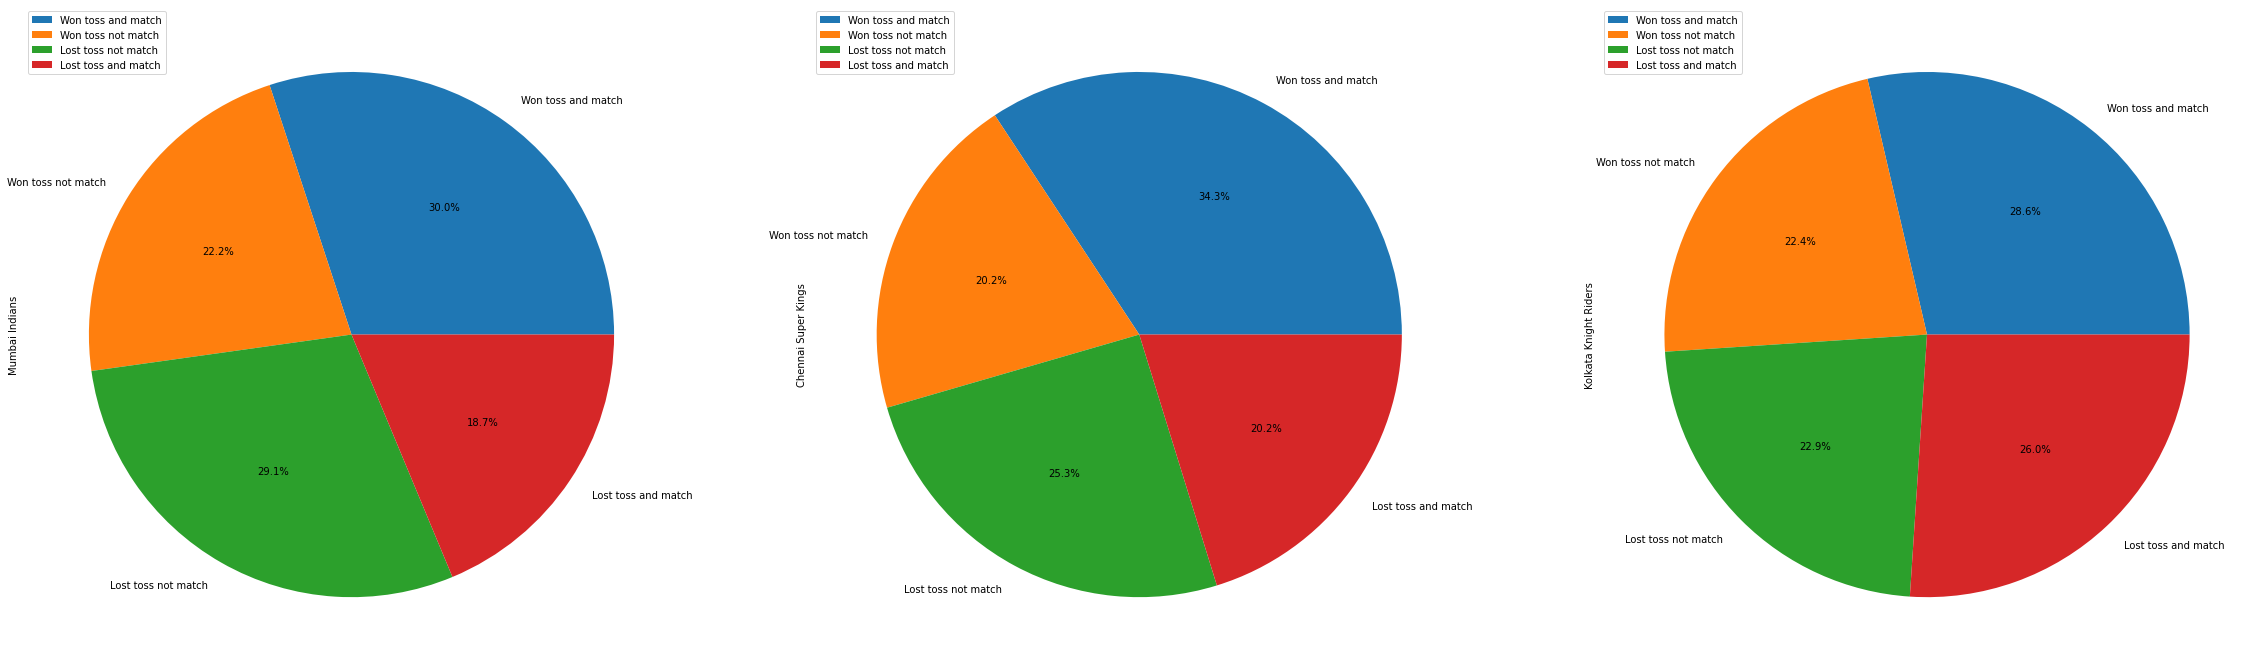

In [134]:
toss_stats_successful.plot.pie(subplots=True,figsize=(40, 40),autopct='%1.1f%%')


#### Observation:

For all the three successful teams it is seen that they have a higher probability of winning the match if they win the toss. 

# Analysis 3 
## Does the performance during the batting and bowling powerplay influence the results of a match?

According the rules of ipl the first 6 overs of every inning of the match are considered to be powerplay.

Reference:https://www.iplt20.com/about/match-playing-conditions/law-41-fielder

Filtering the powerplay data from the ball by ball dataset

In [135]:
powerplay_data=ballbyball.query("over < 6")
powerplay_data

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
79,335982,1,0,1,SC Ganguly,BB McCullum,P Kumar,0,1,1,0,0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore
80,335982,1,0,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
81,335982,1,0,3,BB McCullum,SC Ganguly,P Kumar,0,1,1,0,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore
82,335982,1,0,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
83,335982,1,0,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193417,1237181,1,5,2,SS Iyer,RR Pant,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193418,1237181,1,5,3,SS Iyer,RR Pant,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193419,1237181,1,5,4,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193420,1237181,1,5,5,SS Iyer,RR Pant,NM Coulter-Nile,4,0,4,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


- Grouping the data based on the match and the inning 
- Every row in the resultant dataframe will contain details about the inning,the match id,the numbers of runs scored in the powerplay in the innings and the wickets lost during the powerplay

In [136]:
powerplay_data=powerplay_data.groupby(["id","inning"]).sum()[["total_runs","is_wicket"]].reset_index(level=[0,1])
powerplay_data

,id,inning,total_runs,is_wicket
0,335982,1,61,1
1,335982,2,26,4
2,335983,1,53,1
3,335983,2,63,1
4,335984,1,40,2
...,...,...,...,...
1625,1237178,2,48,2
1626,1237180,1,65,0
1627,1237180,2,49,3
1628,1237181,1,41,3


Selecting the necessary columns for analysis from match data

In [137]:
match_data_analysis3=match[['id','team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]
match_data_analysis3

,id,team1,team2,toss_winner,toss_decision,winner
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,335984,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals
3,335985,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,335986,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders
...,...,...,...,...,...,...
811,1216547,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore
812,1237177,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians
813,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad
814,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals


- merging the match data and the powerplay data
- Every row in the resultant dataframe will contain details about the inning,the match id,the numbers of runs scored in the powerplay in the innings and the wickets lost during the powerplay,the toss winner,toss decision the teams playing the match and the winner of the match.

In [138]:
analysis3 = pd.merge(left=match_data_analysis3, right=powerplay_data, left_on='id', right_on='id')
analysis3

,id,team1,team2,toss_winner,toss_decision,winner,inning,total_runs,is_wicket
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,61,1
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,26,4
2,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,1,53,1
3,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,2,63,1
4,335984,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,1,40,2
...,...,...,...,...,...,...,...,...,...
1625,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2,48,2
1626,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,1,65,0
1627,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,2,49,3
1628,1237181,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,1,41,3


- Function to find out the batting and bowling team in each inning

In [139]:
def batting(row):
    if row["inning"]==1:
        if (row["toss_winner"]==row["team1"] and row["toss_decision"]=="bat"):
            return row["team1"]
        if (row["toss_winner"]==row["team2"] and row["toss_decision"]=="bat"):
            return row["team2"]
        if (row["toss_winner"]==row["team1"] and row["toss_decision"]!="bat"):
            return row["team2"]
        if (row["toss_winner"]==row["team2"] and row["toss_decision"]!="bat"):
            return row["team1"]
    else:
        if (row["toss_winner"]==row["team1"] and row["toss_decision"]=="bat"):
            return row["team2"]
        if (row["toss_winner"]==row["team2"] and row["toss_decision"]=="bat"):
            return row["team1"]
        if (row["toss_winner"]==row["team1"] and row["toss_decision"]!="bat"):
            return row["team1"]
        if (row["toss_winner"]==row["team2"] and row["toss_decision"]!="bat"):
            return row["team2"]
def bowling(row):
    if row["inning"]==1:
        if (row["toss_winner"]==row["team1"] and row["toss_decision"]=="bat"):
            return row["team2"]
        if (row["toss_winner"]==row["team2"] and row["toss_decision"]=="bat"):
            return row["team1"]
        if (row["toss_winner"]==row["team1"] and row["toss_decision"]!="bat"):
            return row["team1"]
        if (row["toss_winner"]==row["team2"] and row["toss_decision"]!="bat"):
            return row["team2"]
    else:
        if (row["toss_winner"]==row["team1"] and row["toss_decision"]=="bat"):
            return row["team1"]
        if (row["toss_winner"]==row["team2"] and row["toss_decision"]=="bat"):
            return row["team2"]
        if (row["toss_winner"]==row["team1"] and row["toss_decision"]!="bat"):
            return row["team2"]
        if (row["toss_winner"]==row["team2"] and row["toss_decision"]!="bat"):
            return row["team1"]
analysis3["bowling"]=analysis3.apply(lambda row:bowling(row),axis=1)   
analysis3["batting"]=analysis3.apply(lambda row:batting(row),axis=1)   
analysis3

,id,team1,team2,toss_winner,toss_decision,winner,inning,total_runs,is_wicket,bowling,batting
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,61,1,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,26,4,Kolkata Knight Riders,Royal Challengers Bangalore
2,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,1,53,1,Kings XI Punjab,Chennai Super Kings
3,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,2,63,1,Chennai Super Kings,Kings XI Punjab
4,335984,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,1,40,2,Delhi Capitals,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...
1625,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2,48,2,Royal Challengers Bangalore,Sunrisers Hyderabad
1626,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,1,65,0,Sunrisers Hyderabad,Delhi Capitals
1627,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,2,49,3,Delhi Capitals,Sunrisers Hyderabad
1628,1237181,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,1,41,3,Mumbai Indians,Delhi Capitals


In [140]:
winners=analysis3[analysis3["batting"]==analysis3["winner"]]
losers=analysis3[analysis3["batting"]!=analysis3["winner"]]

Visualization to find the distribution of runs and wickets taken during powerplay

Text(0.5, 0, 'Wickets taken in powerplay')

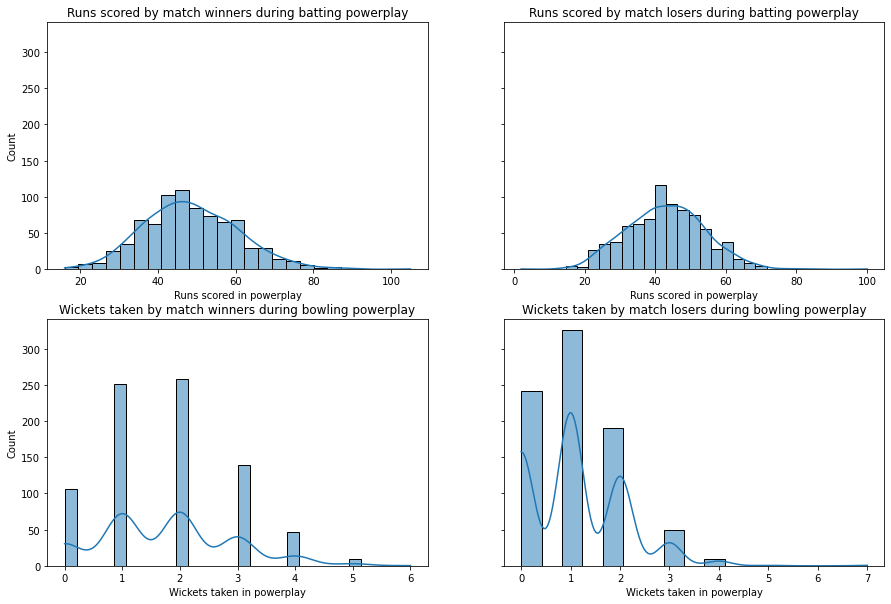

In [141]:
fig, axes = plt.subplots(2,2, figsize=(15, 10), sharey=True)
sns.histplot(ax=axes[0][0],x=analysis3[analysis3["batting"]==analysis3["winner"]]["total_runs"],kde=True)
axes[0][0].set_title('Runs scored by match winners during batting powerplay')
axes[0][0].set_xlabel('Runs scored in powerplay')

sns.histplot(ax=axes[0][1],x=analysis3[analysis3["batting"]!=analysis3["winner"]]["total_runs"],kde=True)
axes[0][1].set_title('Runs scored by match losers during batting powerplay')
axes[0][1].set_xlabel('Runs scored in powerplay')


sns.histplot(ax=axes[1][0],x=analysis3[analysis3["bowling"]==analysis3["winner"]]["is_wicket"],kde=True)
axes[1][0].set_title('Wickets taken by match winners during bowling powerplay')
axes[1][0].set_xlabel('Wickets taken in powerplay')

sns.histplot(ax=axes[1][1],x=analysis3[analysis3["bowling"]!=analysis3["winner"]]["is_wicket"],kde=True)
axes[1][1].set_title('Wickets taken by match losers during bowling powerplay')
axes[1][1].set_xlabel('Wickets taken in powerplay')

## Observation:
- It can be seen that the range of runs scored during the powerplay is very similar during bot winning and losing.
- But the  winning team takes a lot of  wickets during powerplay as opposed to losing teams.

# Analysis 4

How does individual player statistics relate with the outcome of the match?

In [142]:
match

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,hometeam,homegamefor,tossandgamewins
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,Royal Challengers Bangalore,Royal Challengers Bangalore,Lost
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,Kings XI Punjab,Kings XI Punjab,Won
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,Delhi Capitals,Delhi Capitals,Lost
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,Mumbai Indians,Mumbai Indians,Lost
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,Kolkata Knight Riders,Kolkata Knight Riders,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,neutral,awaygame,Lost
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,neutral,awaygame,Lost
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,neutral,awaygame,Won
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,neutral,awaygame,Won


Initial test-I am analysing the results for csk

In [143]:
matchdatacskwin=match[match["winner"]=="Chennai Super Kings"]
matchdatacsklost=match[((match["team1"]=="Chennai Super Kings")|(match["team2"]=="Chennai Super Kings"))& (match["winner"]!="Chennai Super Kings")]

In [144]:
matchdatacskwin

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,hometeam,homegamefor,tossandgamewins
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,Kings XI Punjab,Kings XI Punjab,Won
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,Chennai Super Kings,Chennai Super Kings,Lost
11,335993,Chennai,2008-04-26,JDP Oram,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat,Chennai Super Kings,wickets,9.0,N,NaN,BF Bowden,AV Jayaprakash,Chennai Super Kings,Chennai Super Kings,Lost
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,Royal Challengers Bangalore,Royal Challengers Bangalore,Won
27,336009,Delhi,2008-05-08,MS Dhoni,Feroz Shah Kotla,0,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,4.0,N,NaN,Aleem Dar,RB Tiffin,Delhi Capitals,Delhi Capitals,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,1216506,Abu Dhabi,2020-11-01,RD Gaikwad,Sheikh Zayed Stadium,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,9.0,N,NaN,PG Pathak,VK Sharma,neutral,awaygame,Won
777,1216513,Dubai,2020-10-04,SR Watson,Dubai International Cricket Stadium,0,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,bat,Chennai Super Kings,wickets,10.0,N,NaN,AY Dandekar,Nitin Menon,neutral,awaygame,Lost
792,1216528,Dubai,2020-10-13,RA Jadeja,Dubai International Cricket Stadium,0,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,Chennai Super Kings,runs,20.0,N,NaN,AK Chaudhary,PR Reiffel,neutral,awaygame,Won
800,1216536,Dubai,2020-10-29,RD Gaikwad,Dubai International Cricket Stadium,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,6.0,N,NaN,C Shamshuddin,RK Illingworth,neutral,awaygame,Won


In [145]:
cskwins=pd.merge(left=matchdatacskwin, right=ballbyball, left_on='id', right_on='id')
cskwins=cskwins[['id','venue','team1', 'team2', 'winner', 'result','batsman','total_runs','batting_team','is_wicket']]
cskwins=cskwins[cskwins['batting_team']=="Chennai Super Kings"]
cskwins["result"]="win"
csklost=pd.merge(left=matchdatacsklost, right=ballbyball, left_on='id', right_on='id')
csklost=csklost[['id','venue','team1', 'team2', 'winner', 'result','batsman','total_runs','batting_team','is_wicket']]
csklost=csklost[csklost['batting_team']=="Chennai Super Kings"]
csklost["result"]="lost"

In [146]:
csklost=csklost.groupby(["id",'batsman']).sum()
csklost=csklost.reset_index(level=[0,1])


cskwins=cskwins.groupby(["id",'batsman']).sum()
cskwins=cskwins.reset_index(level=[0,1])
csklost["result"]="lost"
cskwins["result"]="win"
analysis4=pd.concat([cskwins,csklost]).sort_values(by="total_runs",ascending=False)
analysis4

,id,batsman,total_runs,is_wicket,result
119,419137,M Vijay,128,1,win
552,1136620,SR Watson,121,0,win
277,548380,M Vijay,119,1,win
1,335983,MEK Hussey,117,0,win
503,1136577,SR Watson,108,1,win
...,...,...,...,...,...
482,1136561,DL Chahar,0,1,win
479,829821,SK Raina,0,1,win
429,1136587,DJ Bravo,0,1,lost
177,501221,DE Bollinger,0,0,lost


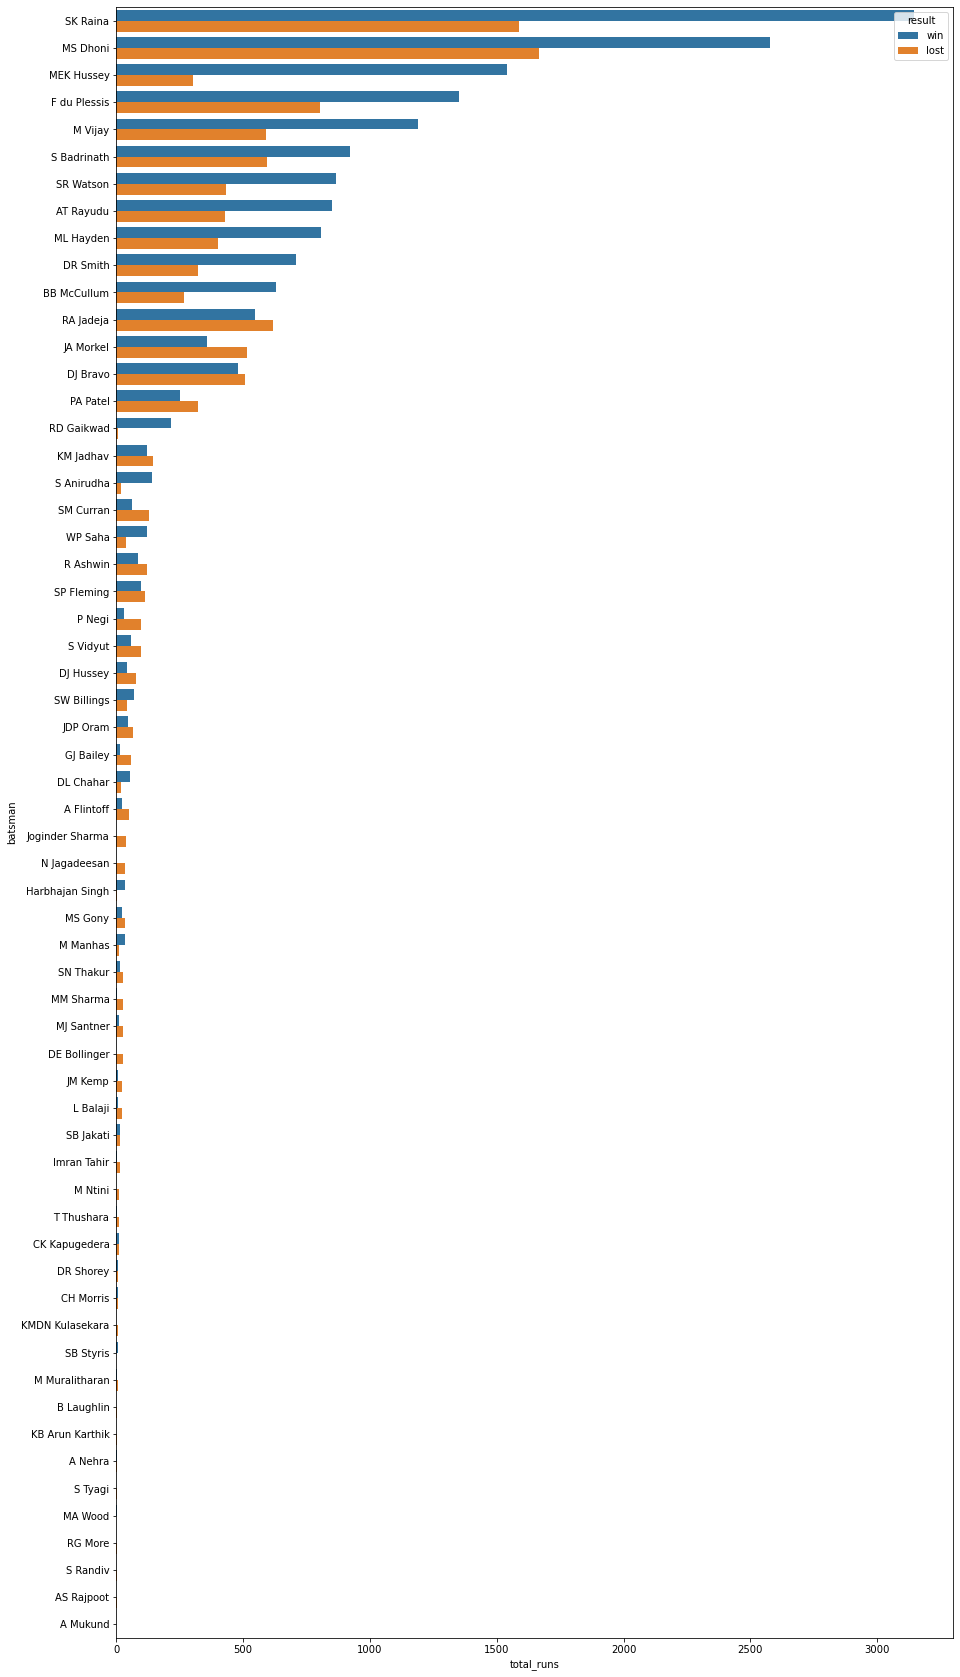

In [147]:
a=analysis4.groupby(['batsman','result'])["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False)
p=sns.barplot(x="total_runs", y='batsman', hue="result",
            data=a)
plt.gcf().set_size_inches(15,30)

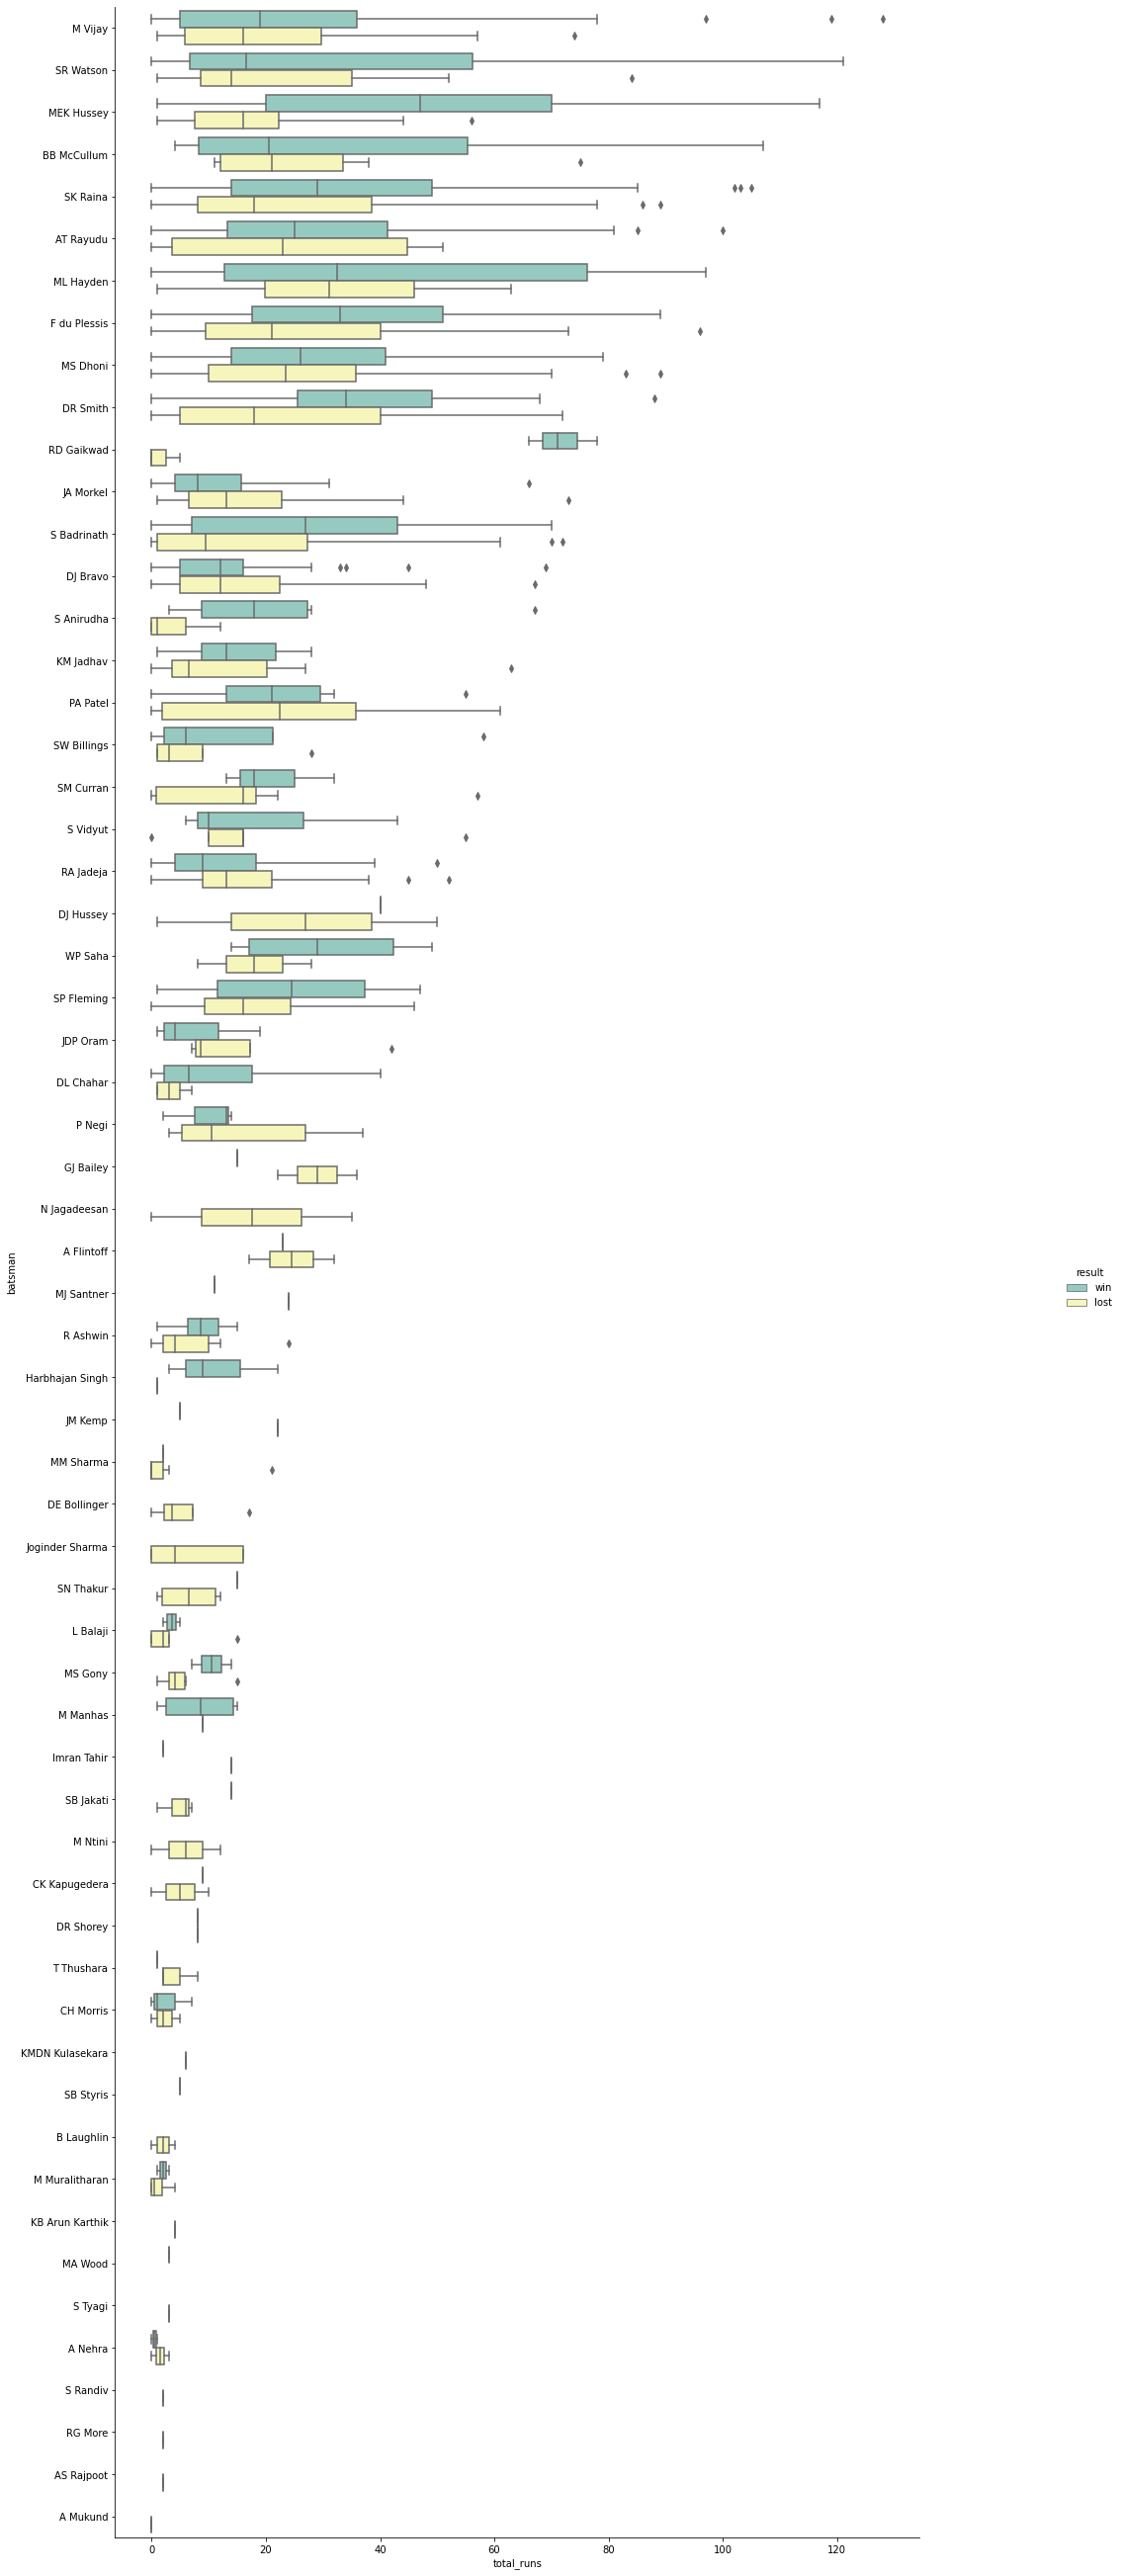

In [148]:
# a=analysis4.groupby(['batsman','result'])["total_runs"].mean().reset_index()
p=sns.catplot(x="total_runs", y='batsman',kind="box",hue="result",palette="Set3",
            data=analysis4)
plt.gcf().set_size_inches(20,40)

From the barplot it is evident that the batsmen secured more runs in the matches where csk won.
In matches that csk lost the bowlers have scored runs.
This is because in matches that csk has won the batsmen may have scored the runs and finished the match and the bowlers would have played a lot only when the batting order collapses and the bowlers are expected to play.

# Analysis 4
# Does hard-hitting ability of a team result in a higher probability of winning a match? 




Hard-hitting ability = (number of 4’s+number of 6’s/total number  of balls played)
Does the hard-hitting ability of a team result in a higher probability of winning a match? 
For every match I will calculate the hard-hitting ability (number of 4’s+number of 6’s/total number 
of balls played) for both teams in a match. I will then aggregate the hard-hitting ability for every team for 
every season. Then I will use a bar plot to compare how the hard-hitting ability of team changed with the 
season and how the number of matches won changed with season.

- For every match i have calculated the total number of balls played,the number of fours hit  and the number of 6's hit by the batting team in every inning and then joined it with the match details
- Every row of the resultant datafram will have the following information:the match id,the batting team,total balls played by the team,the number of fours hit by the team,and the number of sixes hit by the team.
- If the team has not hit any 4 or 6 then the resultant entry will be a null value so i have filled the null values with 0.

In [149]:
totalballs=ballbyball.groupby(["id","batting_team"]).size().reset_index(name='total_balls')
ballbyball4=ballbyball[ballbyball["total_runs"]==4]
ballbyball6=ballbyball[ballbyball["total_runs"]==6]
ballbyball4=ballbyball4.groupby(["id","batting_team"]).size().reset_index(name='num_4s')
ballbyball6=ballbyball6.groupby(["id","batting_team"]).size().reset_index(name='num_6s')
analysis6=pd.merge(left=totalballs, right=ballbyball4,how="left", left_on=["id","batting_team"], right_on=["id","batting_team"])
analysis6=pd.merge(left=analysis6, right=ballbyball6,how="left", left_on=["id","batting_team"], right_on=["id","batting_team"])
analysis6=analysis6.fillna(0)
analysis6

,id,batting_team,total_balls,num_4s,num_6s
0,335982,Kolkata Knight Riders,124,16.0,14.0
1,335982,Royal Challengers Bangalore,101,4.0,3.0
2,335983,Chennai Super Kings,124,19.0,16.0
3,335983,Kings XI Punjab,124,18.0,9.0
4,335984,Delhi Capitals,97,18.0,1.0
...,...,...,...,...,...
1625,1237178,Sunrisers Hyderabad,123,12.0,3.0
1626,1237180,Delhi Capitals,125,15.0,5.0
1627,1237180,Sunrisers Hyderabad,125,12.0,9.0
1628,1237181,Delhi Capitals,123,15.0,4.0


calculating the hard hitting ability

In [150]:
analysis6["hard_hitting_ability"]=(analysis6['num_4s']+analysis6['num_6s'])/analysis6['total_balls']

Joining the data with the match data to find the information about the season in which the match was played,the winner of the match.

In [151]:
analysis6=pd.merge(left=analysis6, right=match[["id","winner","date"]],how="inner", left_on="id", right_on="id")
def result(row):
    if row["batting_team"]==row["winner"]:
        return "won"
    else:
        return "lost"
analysis6["result"]=analysis6.apply(lambda row:result(row),axis=1)   
analysis6['date']= pd.to_datetime(analysis6['date'])
analysis6["season"]=pd.DatetimeIndex(analysis6['date']).year

Grouping the data based on the season and team.

In [152]:
hard_hitting_seasonwise=analysis6.groupby(["season","batting_team"])["hard_hitting_ability"].mean().reset_index()
match["season"]=pd.DatetimeIndex(match['date']).year

Calculating the number of wins seasonwise

In [153]:
wins_seasonwise=pd.DataFrame(match.groupby(["season","winner"])["winner"].count())
wins_seasonwise=wins_seasonwise.rename(columns={'winner':'num_wins'})
wins_seasonwise=wins_seasonwise.reset_index()

In [154]:
dataanalysis6=pd.merge(left=hard_hitting_seasonwise, right=wins_seasonwise,how="inner", left_on=["season","batting_team"], right_on=["season","winner"])

In [155]:
dataanalysis6=dataanalysis6.drop(columns=['winner'])
dataanalysis6=dataanalysis6.rename(columns={'batting_team':'team'})

Text(0.5, 0, 'Season')

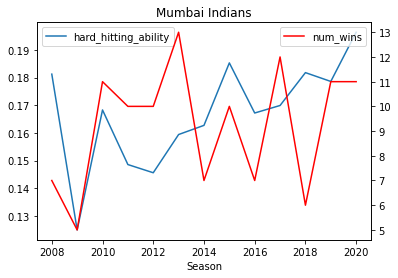

In [156]:
# fig, axes = plt.subplots(2,2, figsize=(15, 10), sharey=True)
axes[0][0] = dataanalysis6[dataanalysis6["team"]=="Mumbai Indians"].plot(x="season", y="hard_hitting_ability")
ax2 = axes[0][0].twinx()
dataanalysis6[dataanalysis6["team"]=="Mumbai Indians"].plot(x="season", y="num_wins", ax=ax2, color="r")
axes[0][0].set_title('Mumbai Indians')
axes[0][0].set_xlabel('Season')

Text(0.5, 0, 'Season')

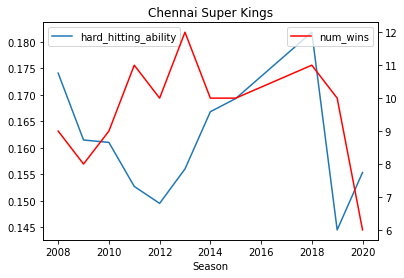

In [157]:
axes[0][1] = dataanalysis6[dataanalysis6["team"]=="Chennai Super Kings"].plot(x="season", y="hard_hitting_ability")
ax2 = axes[0][1].twinx()
dataanalysis6[dataanalysis6["team"]=="Chennai Super Kings"].plot(x="season", y="num_wins", ax=ax2, color="r")
axes[0][1].set_title('Chennai Super Kings')
axes[0][1].set_xlabel('Season')

Text(0.5, 0, 'Season')

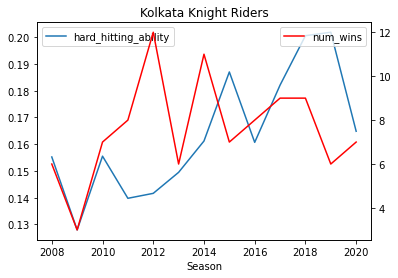

In [158]:
axes[1][0] = dataanalysis6[dataanalysis6["team"]=="Kolkata Knight Riders"].plot(x="season", y="hard_hitting_ability")
ax2 = axes[1][0].twinx()
dataanalysis6[dataanalysis6["team"]=="Kolkata Knight Riders"].plot(x="season", y="num_wins", ax=ax2, color="r")
axes[1][0].set_title('Kolkata Knight Riders')
axes[1][0].set_xlabel('Season')



Text(0.5, 0, 'Season')

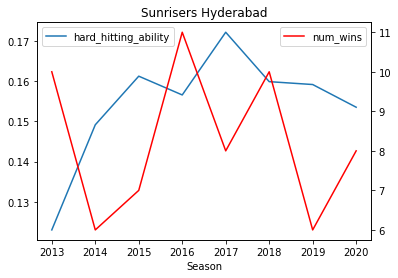

In [159]:
axes[1][0] = dataanalysis6[dataanalysis6["team"]=="Sunrisers Hyderabad"].plot(x="season", y="hard_hitting_ability")
ax2 = axes[1][0].twinx()
dataanalysis6[dataanalysis6["team"]=="Sunrisers Hyderabad"].plot(x="season", y="num_wins", ax=ax2, color="r")
axes[1][0].set_title('Sunrisers Hyderabad')
axes[1][0].set_xlabel('Season')

Text(0.5, 0, 'Season')

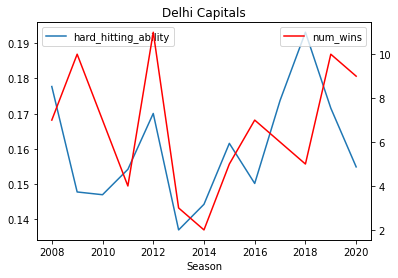

In [160]:
axes[1][0] = dataanalysis6[dataanalysis6["team"]=="Delhi Capitals"].plot(x="season", y="hard_hitting_ability")
ax2 = axes[1][0].twinx()
dataanalysis6[dataanalysis6["team"]=="Delhi Capitals"].plot(x="season", y="num_wins", ax=ax2, color="r")
axes[1][0].set_title('Delhi Capitals')
axes[1][0].set_xlabel('Season')

Text(0.5, 0, 'Season')

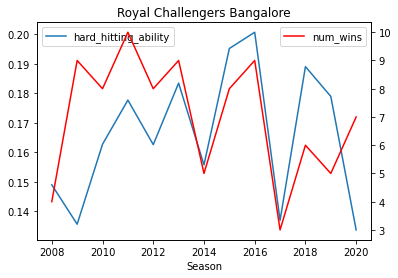

In [161]:
axes[1][0] = dataanalysis6[dataanalysis6["team"]=="Royal Challengers Bangalore"].plot(x="season", y="hard_hitting_ability")
ax2 = axes[1][0].twinx()
dataanalysis6[dataanalysis6["team"]=="Royal Challengers Bangalore"].plot(x="season", y="num_wins", ax=ax2, color="r")
axes[1][0].set_title('Royal Challengers Bangalore')
axes[1][0].set_xlabel('Season')

Text(0.5, 0, 'Season')

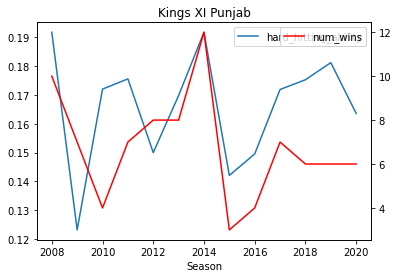

In [162]:
axes[1][0] = dataanalysis6[dataanalysis6["team"]=="Kings XI Punjab"].plot(x="season", y="hard_hitting_ability")
ax2 = axes[1][0].twinx()
dataanalysis6[dataanalysis6["team"]=="Kings XI Punjab"].plot(x="season", y="num_wins", ax=ax2, color="r")
axes[1][0].set_title('Kings XI Punjab')
axes[1][0].set_xlabel('Season')

Text(0.5, 0, 'Season')

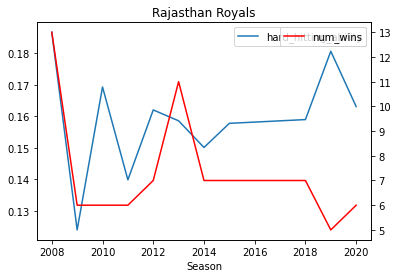

In [163]:

axes[1][0] = dataanalysis6[dataanalysis6["team"]=="Rajasthan Royals"].plot(x="season", y="hard_hitting_ability")
ax2 = axes[1][0].twinx()
dataanalysis6[dataanalysis6["team"]=="Rajasthan Royals"].plot(x="season", y="num_wins", ax=ax2, color="r")
axes[1][0].set_title('Rajasthan Royals')
axes[1][0].set_xlabel('Season')




<AxesSubplot:xlabel='season', ylabel='hard_hitting_ability'>

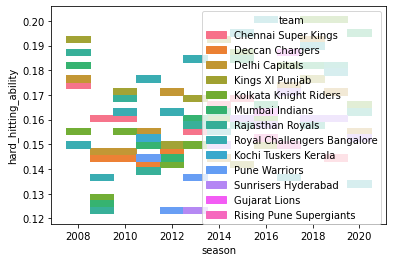

In [164]:
sns.histplot(
    dataanalysis6, x="season", y="hard_hitting_ability",hue="team",
    bins=30, discrete=(True, False), log_scale=(False, False),
)

## Analysis 5 : Does the number of runs conceded in the death overs relate with the outcome of the match? 
For every match I will calculate the runs conceded in the death overs by the teams. Then I will plot 
violin plots to see how the distribution of  the runs conceded in the death overs for different outcomes of 
the match.  




- Death overs are the last 5 overs in an ipl match.

- So as ipl is a t20 league overs 15-20 would be the death overs.

- So filtering the rows that have information about the death overs only.

In [165]:
deathoverdata=ballbyball.query("over > 14")


- I'm grouping the data by id and innings and finding the sum of total runs and wicket.

- From that I will be able to  get a dataframe in which each row has the id_number of the match,the inning,the total runs scored in the death overs and the number of wickets lost during the death overs.

In [166]:
deathoverdata=deathoverdata.groupby(["id","inning"]).sum()[["total_runs","is_wicket"]].reset_index(level=[0,1])
deathoverdata

,id,inning,total_runs,is_wicket
0,335982,1,68,1
1,335982,2,1,1
2,335983,1,79,1
3,335983,2,42,1
4,335984,1,33,1
...,...,...,...,...
1535,1237178,2,45,0
1536,1237180,1,50,1
1537,1237180,2,43,4
1538,1237181,1,38,3



- From the match dataframe I'm selecting only the necessary columns into a new dataframe.
- I then join the selected match daatset to the death over data frame in order to get a dataframe in which each row contains details about the teams playing the match the innings the toss winner and the decision and the the total runs scored in the death overs and the number of wickets lost during the death overs for that particular inning

In [167]:
match_data_analysis7=match[['id','team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

analysis7 = pd.merge(left=match_data_analysis7, right=deathoverdata, left_on='id', right_on='id')

analysis7


,id,team1,team2,toss_winner,toss_decision,winner,inning,total_runs,is_wicket
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,68,1
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,1,1
2,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,1,79,1
3,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,2,42,1
4,335984,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,1,33,1
...,...,...,...,...,...,...,...,...,...
1535,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2,45,0
1536,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,1,50,1
1537,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,2,43,4
1538,1237181,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,1,38,3



- Creating a column to find out which team was batting and bowling during each inning.

In [168]:
analysis7["bowling"]=analysis7.apply(lambda row:bowling(row),axis=1)   
analysis7["batting"]=analysis7.apply(lambda row:batting(row),axis=1)          
analysis7

,id,team1,team2,toss_winner,toss_decision,winner,inning,total_runs,is_wicket,bowling,batting
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,68,1,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore
2,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,1,79,1,Kings XI Punjab,Chennai Super Kings
3,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,2,42,1,Chennai Super Kings,Kings XI Punjab
4,335984,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,1,33,1,Delhi Capitals,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...
1535,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2,45,0,Royal Challengers Bangalore,Sunrisers Hyderabad
1536,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,1,50,1,Sunrisers Hyderabad,Delhi Capitals
1537,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,2,43,4,Delhi Capitals,Sunrisers Hyderabad
1538,1237181,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,1,38,3,Mumbai Indians,Delhi Capitals


In order to analyse the distribution of runs scored in the death overs by the teams I'm doing the following
- Creating a new dataframe winners which contains details about the innings when the winner of the match was batting.
- Creating a new dataframe winners which contains details about the innings when the loser of the match was batting.
- Merging the 2 dataframes to create violin plots.

In [169]:
winners=analysis7[analysis7["batting"]==analysis7["winner"]]
winners["status"]=1
losers=analysis7[analysis7["batting"]!=analysis7["winner"]]
losers["status"]=0
analysis7copy = pd.concat([winners,losers], ignore_index=True)
analysis7copy

<ipython-input-169-e01fcbe86ca5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-169-e01fcbe86ca5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,team1,team2,toss_winner,toss_decision,winner,inning,total_runs,is_wicket,bowling,batting,status
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,68,1,Royal Challengers Bangalore,Kolkata Knight Riders,1
1,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,1,79,1,Kings XI Punjab,Chennai Super Kings,1
2,335984,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,2,4,0,Rajasthan Royals,Delhi Capitals,1
3,335985,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,2,48,1,Mumbai Indians,Royal Challengers Bangalore,1
4,335986,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,2,31,1,Deccan Chargers,Kolkata Knight Riders,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1216547,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,2,89,1,Royal Challengers Bangalore,Mumbai Indians,0
1536,1237177,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,2,31,3,Mumbai Indians,Delhi Capitals,0
1537,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,1,38,3,Sunrisers Hyderabad,Royal Challengers Bangalore,0
1538,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,2,43,4,Delhi Capitals,Sunrisers Hyderabad,0


## The Distribution of the runs scored by the teams during the death overs when the won the match and when they lost the match


<AxesSubplot:xlabel='total_runs', ylabel='batting'>

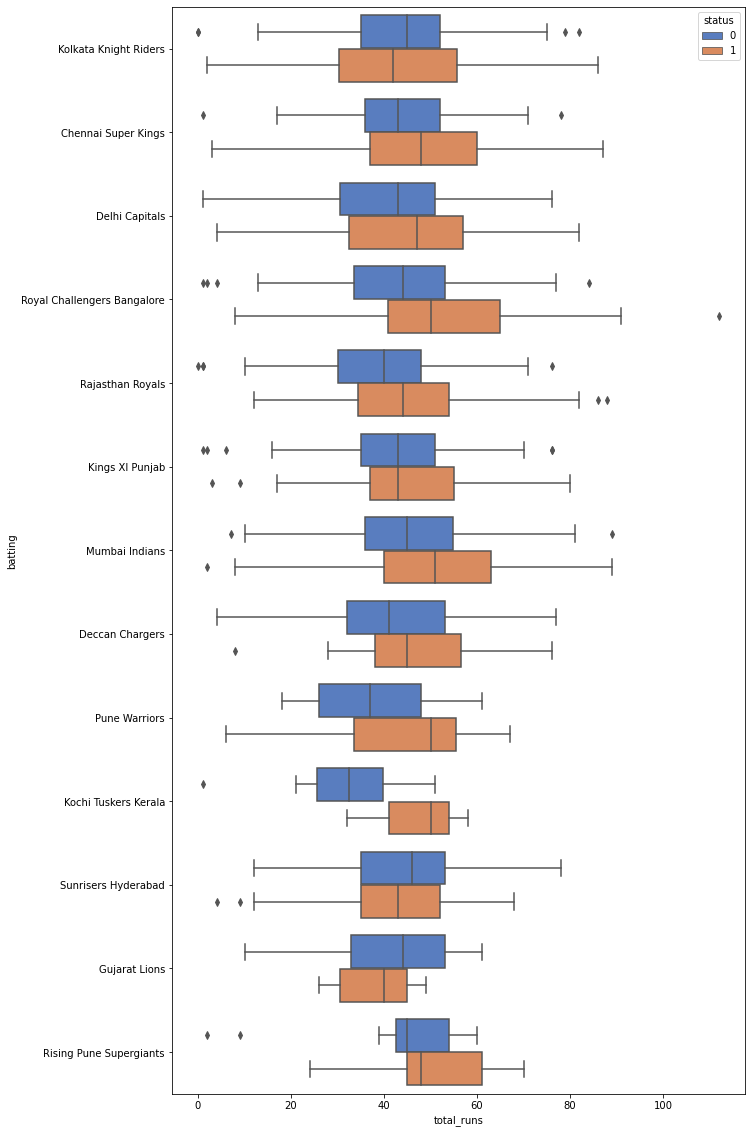

In [170]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10.27,20)
sns.boxplot(y="batting", x="total_runs", hue="status",data=analysis7copy, palette="muted")

#1-winners
#0-losers

## The Distribution of the wickets lost by the teams during the death overs when the won the match and when they lost the match



<AxesSubplot:xlabel='is_wicket', ylabel='batting'>

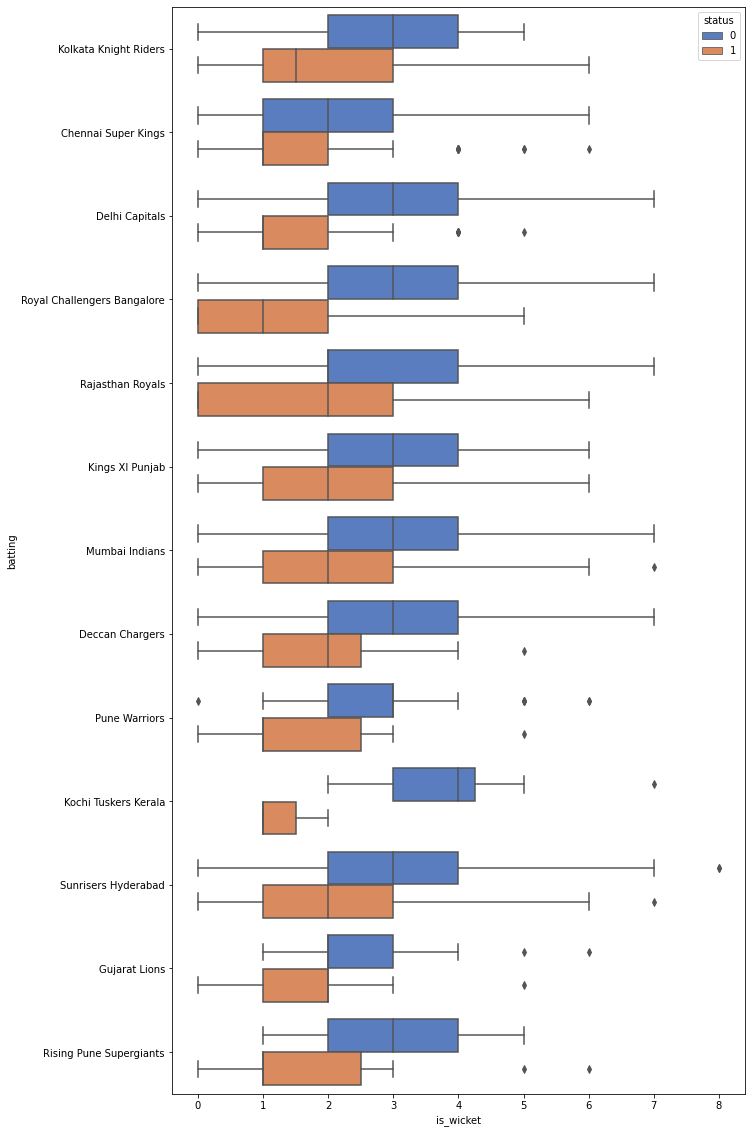

In [171]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10.27,20)
sns.boxplot(y="batting", x="is_wicket", hue="status",data=analysis7copy, palette="muted")

## The Distribution of the runs scored in the death overs by winning and losing teams 

## The Distribution of the wickets taken in the death overs by winning and losing teams 


Text(0.5, 0, 'Wickets taken in death overs')

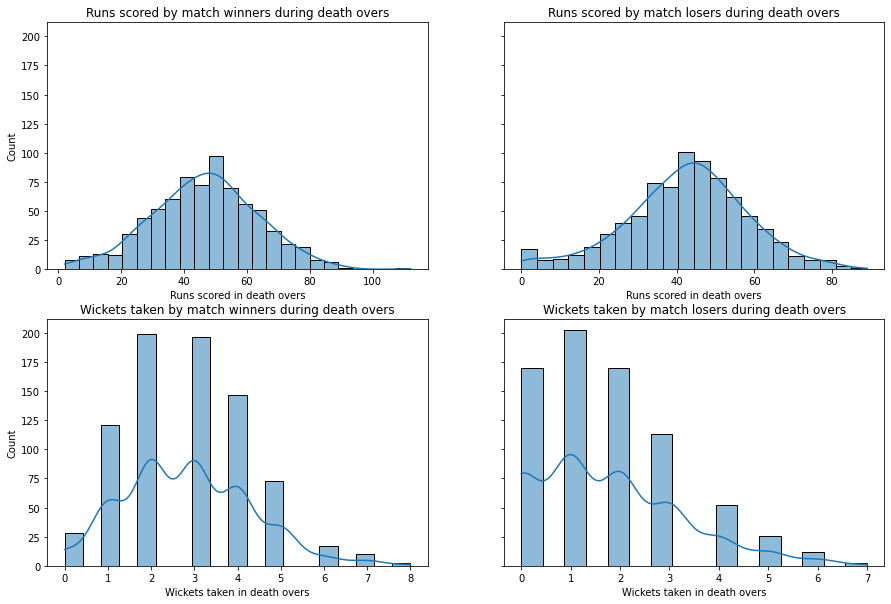

In [172]:
fig, axes = plt.subplots(2,2, figsize=(15, 10), sharey=True)
sns.histplot(ax=axes[0][0],x=analysis7[analysis7["batting"]==analysis7["winner"]]["total_runs"],kde=True)
axes[0][0].set_title('Runs scored by match winners during death overs')
axes[0][0].set_xlabel('Runs scored in death overs')

sns.histplot(ax=axes[0][1],x=analysis7[analysis7["batting"]!=analysis7["winner"]]["total_runs"],kde=True)
axes[0][1].set_title('Runs scored by match losers during death overs')
axes[0][1].set_xlabel('Runs scored in death overs')


sns.histplot(ax=axes[1][0],x=analysis7[analysis7["bowling"]==analysis7["winner"]]["is_wicket"],kde=True)
axes[1][0].set_title('Wickets taken by match winners during death overs')
axes[1][0].set_xlabel('Wickets taken in death overs')

sns.histplot(ax=axes[1][1],x=analysis7[analysis7["bowling"]!=analysis7["winner"]]["is_wicket"],kde=True)
axes[1][1].set_title('Wickets taken by match losers during death overs')
axes[1][1].set_xlabel('Wickets taken in death overs')

In [173]:
analysis7

,id,team1,team2,toss_winner,toss_decision,winner,inning,total_runs,is_wicket,bowling,batting
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,68,1,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore
2,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,1,79,1,Kings XI Punjab,Chennai Super Kings
3,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,2,42,1,Chennai Super Kings,Kings XI Punjab
4,335984,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,1,33,1,Delhi Capitals,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...
1535,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2,45,0,Royal Challengers Bangalore,Sunrisers Hyderabad
1536,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,1,50,1,Sunrisers Hyderabad,Delhi Capitals
1537,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,2,43,4,Delhi Capitals,Sunrisers Hyderabad
1538,1237181,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,1,38,3,Mumbai Indians,Delhi Capitals


### To check whether there is statistical significance in the relationship between the result and the runs scored in the death overs.
- I used OLS to perform a regression for the relationship between categorical value of the result and the runs scored in the death overs.

In [174]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols('status~total_runs', data=analysis7copy).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 status   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     23.46
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.40e-06
Time:                        15:11:28   Log-Likelihood:                -1105.2
No. Observations:                1540   AIC:                             2214.
Df Residuals:                    1538   BIC:                             2225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3168      0.037      8.627      0.000       0.245       0.389
total_runs     0.0038      0.001      4.844      0.000       0.002       0.005
==============================================================================
Omnibus:                     5823.007   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.795
Skew:                           0.067   Prob(JB):                     3.13e-53
Kurtosis:                       1.063   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value of the f-statistic(1.40e-06) is less than alpha=0.05.
This means we reject the null hypothesis.
> **There is a statistically significant relationship between the match result and the runs scored in the death overs**

# Analysis 6
## Does the decision of the winner of the toss influence the result of the match

### Cross tabulation to show the decisions that different teams took when they won the toss

In [175]:
teamtossstats=match[["toss_winner","toss_decision"]]
ct = pd.crosstab(teamtossstats.toss_winner,teamtossstats.toss_decision,margins=True,normalize='index')
ct

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,0.525773,0.474227
Deccan Chargers,0.558140,0.441860
Delhi Capitals,0.360000,0.640000
Gujarat Lions,0.066667,0.933333
Kings XI Punjab,0.317647,0.682353
Kochi Tuskers Kerala,0.375000,0.625000
Kolkata Knight Riders,0.346939,0.653061
Mumbai Indians,0.452830,0.547170
Pune Warriors,0.550000,0.450000


#### Observation:
From the crosstabulation it is evident that most times the winner of the toss decided to field first.

In [176]:
data=[]
for i in match.venue.unique():
    num_matches=len(match[(match["venue"]==i)])
    num_toss_field=len(match[(match["venue"]==i) & (match["toss_decision"]=="field")])
    num_toss_bat=len(match[(match["venue"]==i) & (match["toss_decision"]=="bat")])
    num_toss_bat_won=len(match[(match["venue"]==i) & (match["toss_decision"]=="bat") & (match["toss_winner"]==match["winner"])])
    num_toss_field_won=len(match[(match["venue"]==i) & (match["toss_decision"]=="field") & (match["toss_winner"]==match["winner"])])
    num_toss_bat_lost=len(match[(match["venue"]==i) & (match["toss_decision"]=="bat") & (match["toss_winner"]!=match["winner"])])
    num_toss_field_lost=len(match[(match["venue"]==i) & (match["toss_decision"]=="field") & (match["toss_winner"]!=match["winner"])])
    data.append([i,num_matches,num_toss_field,num_toss_bat,num_toss_bat_won, num_toss_field_won,num_toss_bat_lost,num_toss_field_lost])
#     row={"team_name":i,"home matches":homematches,"away matches":awaymatches,"home match wins":homematchwins,"away match wins":awaymatchwins
per_venue_stats=pd.DataFrame(data,columns=["venue_name","number matches","chose to field","chose to bat","chose to bat and won","chose to field and won","chose to bat and lost","chose to field and lost"])

In [177]:
match.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'hometeam', 'homegamefor', 'tossandgamewins', 'season'],
      dtype='object')

In [178]:
dataanalysis6=match[["id","venue",'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

## Cross tabulation to show what the winners of the toss decided to do at every venue


In [195]:
ct = pd.crosstab(dataanalysis6.venue,dataanalysis6.toss_decision)
ct=ct.reset_index()
ct=ct.loc[0:33,:]
ct

toss_decision,venue,bat,field
0,Barabati Stadium,2,5
1,Brabourne Stadium,6,5
2,Buffalo Park,3,0
3,De Beers Diamond Oval,2,1
4,Dr DY Patil Sports Academy,7,10
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,5,8
6,Dubai International Cricket Stadium,15,18
7,Eden Gardens,28,49
8,Feroz Shah Kotla,32,42
9,Green Park,0,4


In [196]:
stats=ct.melt(id_vars=["venue"], var_name="variable", value_name="value")
stats

,venue,variable,value
0,Barabati Stadium,bat,2
1,Brabourne Stadium,bat,6
2,Buffalo Park,bat,3
3,De Beers Diamond Oval,bat,2
4,Dr DY Patil Sports Academy,bat,7
...,...,...,...
63,St George's Park,field,0
64,Subrata Roy Sahara Stadium,field,2
65,SuperSport Park,field,6
66,"Vidarbha Cricket Association Stadium, Jamtha",field,1


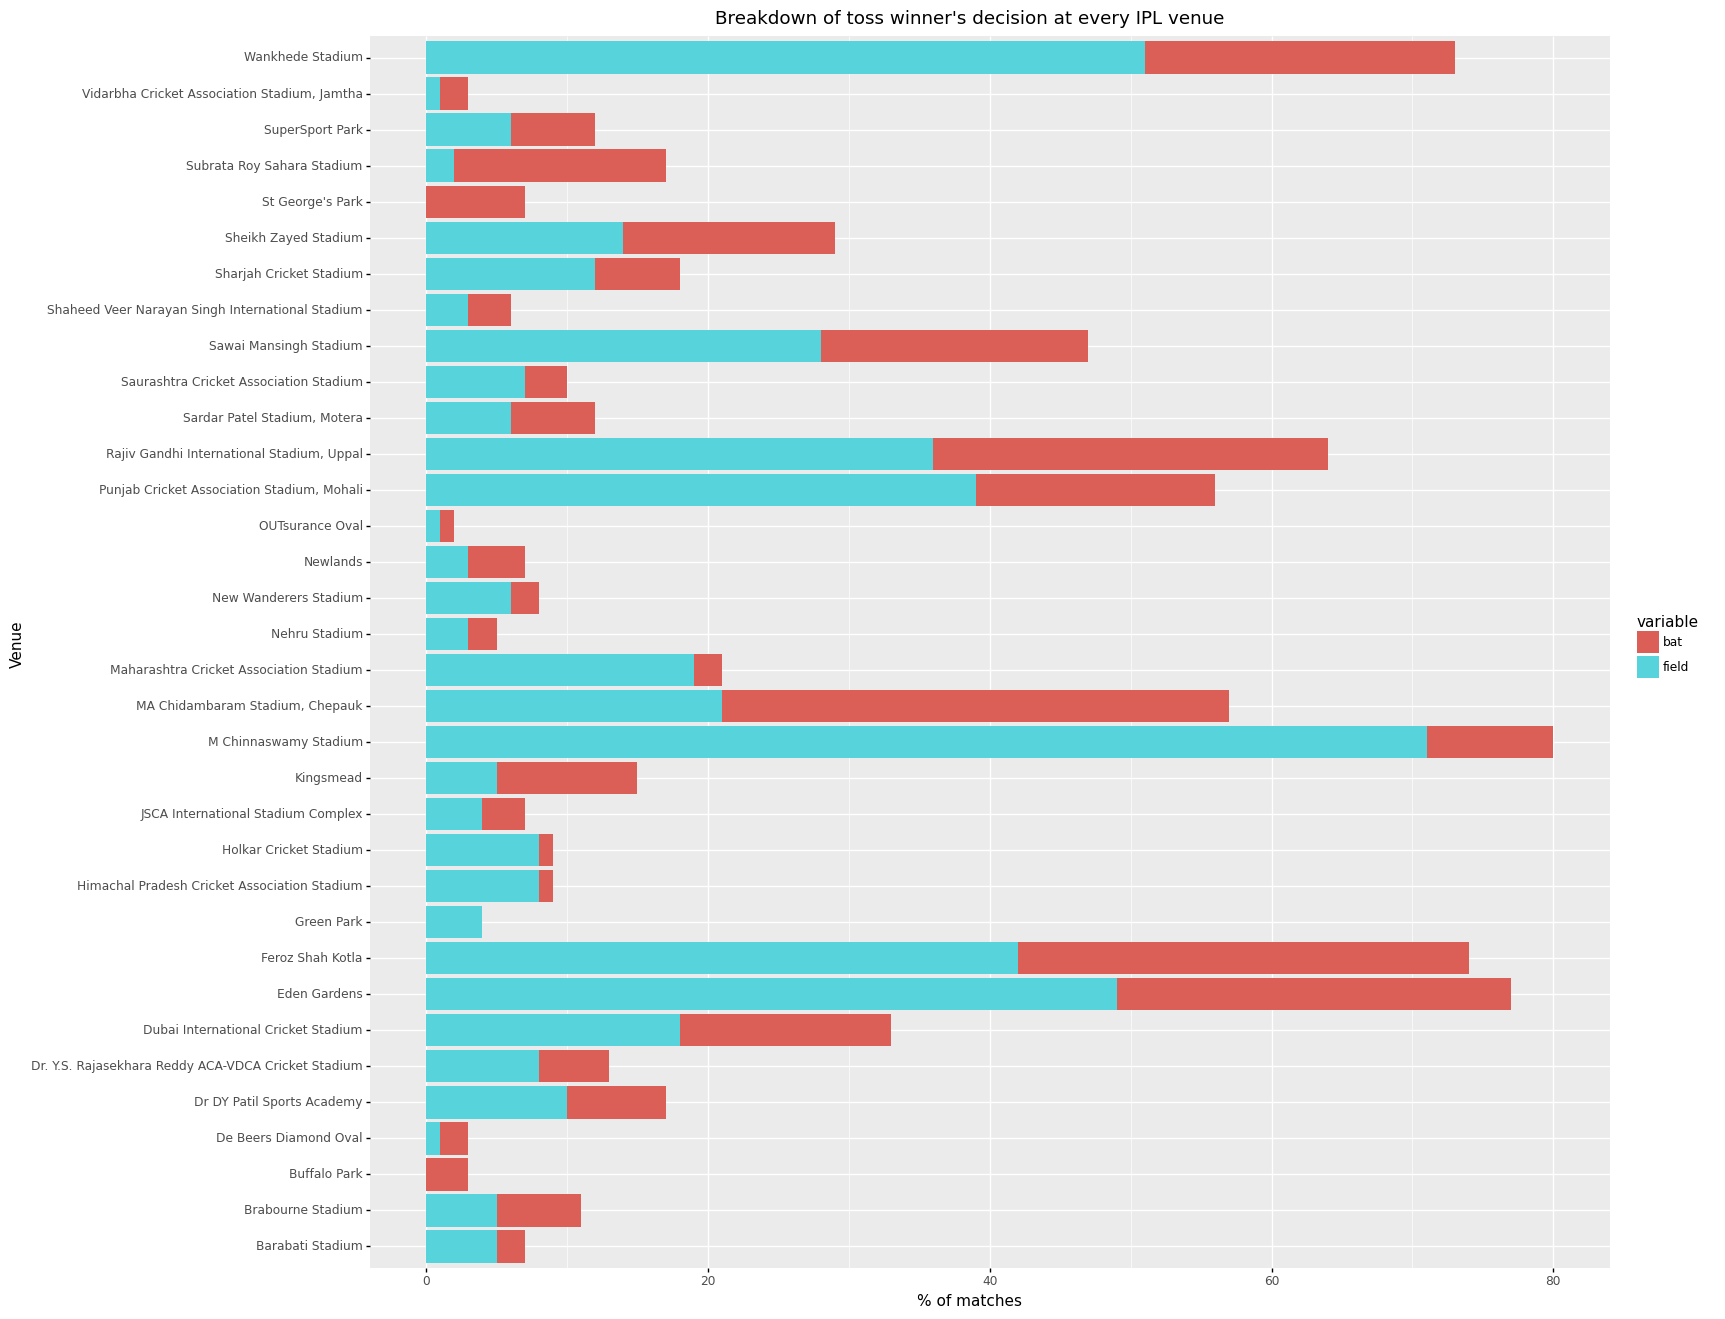

<ggplot: (8766282332022)>

In [200]:
plot=ggplot(stats, aes('venue', 'value', fill='variable'))
xlabel=ylab("% of matches")
ylabel=xlab("Venue")
title=ggtitle("Breakdown of toss winner's decision at every IPL venue")
bars=geom_bar(stat='identity', position='stack')
flipxy=coord_flip()
fig_size=theme(figure_size=(16,16))
a=plot+bars+title+xlabel+ylabel+flipxy+fig_size
a